In [1]:
#import libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the raw data in the CSV file into a dataframe, df

df = pd.read_csv("Road_Accident_Data.csv")

#Show the first five rows
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64


In [5]:
#Dealing with missing values

# Remove rows with missing values
#data_without_missing = df.dropna()

# Remove columns with missing values
#data_without_missing = df.dropna(axis=1)

# Impute missing values with mean
#df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Forward-fill missing values
df.fillna(method='ffill', inplace=True)

# Interpolate missing values
#df['column_name'].interpolate(method='linear', inplace=True)

# Create indicator variable for missing values
#df['column_name_indicator'] = df['column_name'].isnull().astype(int)



In [6]:
# Check for missing values AGAIN
missing_values = df.isnull().sum()
print(missing_values)

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  0
dtype: int64


In [8]:
# Identify unique values in each column
unique_values = df.nunique()
print(unique_values)

Million Plus Cities     50
Cause category           6
Cause Subcategory       35
Outcome of Incident      5
Count                  800
dtype: int64


In [9]:
# Calculate basic summary statistics
summary_stats = df.describe()

#If you want to include non-numeric columns as well, you can use the include='all' parameter
#summary_stats = data.describe(include='all')

print(summary_stats)

             Count
count  9550.000000
mean    103.686178
std     275.165895
min       0.000000
25%       0.000000
50%      12.000000
75%      71.000000
max    3148.000000


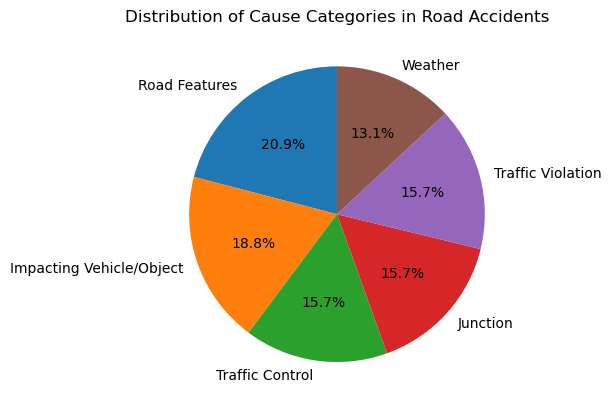

In [13]:
# Calculate the count of each cause category
category_counts = df['Cause category'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title("Distribution of Cause Categories in Road Accidents")

# Display the plot
plt.show()

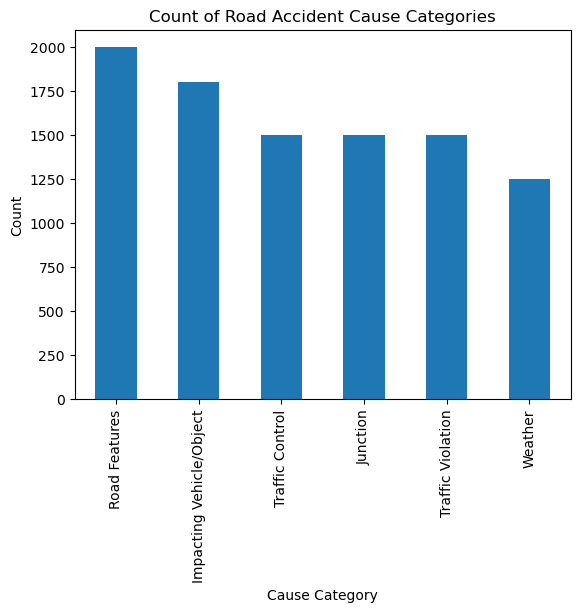

In [14]:
# Calculate the count of each cause category
category_counts = df['Cause category'].value_counts()

# Create a bar plot
category_counts.plot(kind='bar')

# Set plot title and axes labels
plt.title("Count of Road Accident Cause Categories")
plt.xlabel("Cause Category")
plt.ylabel("Count")

# Display the plot
plt.show()

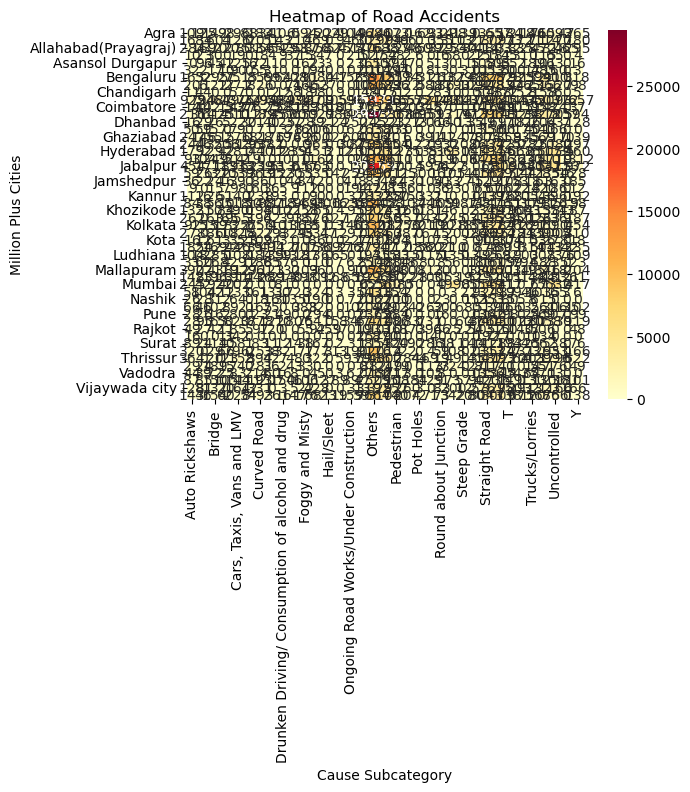

In [15]:
# Pivot the data to create a matrix for the heatmap
heatmap_data = df.pivot_table(index='Million Plus Cities', columns='Cause Subcategory', values='Count', aggfunc='sum')

# Create a heatmap
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g')

# Set plot title and axes labels
plt.title("Heatmap of Road Accidents")
plt.xlabel("Cause Subcategory")
plt.ylabel("Million Plus Cities")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

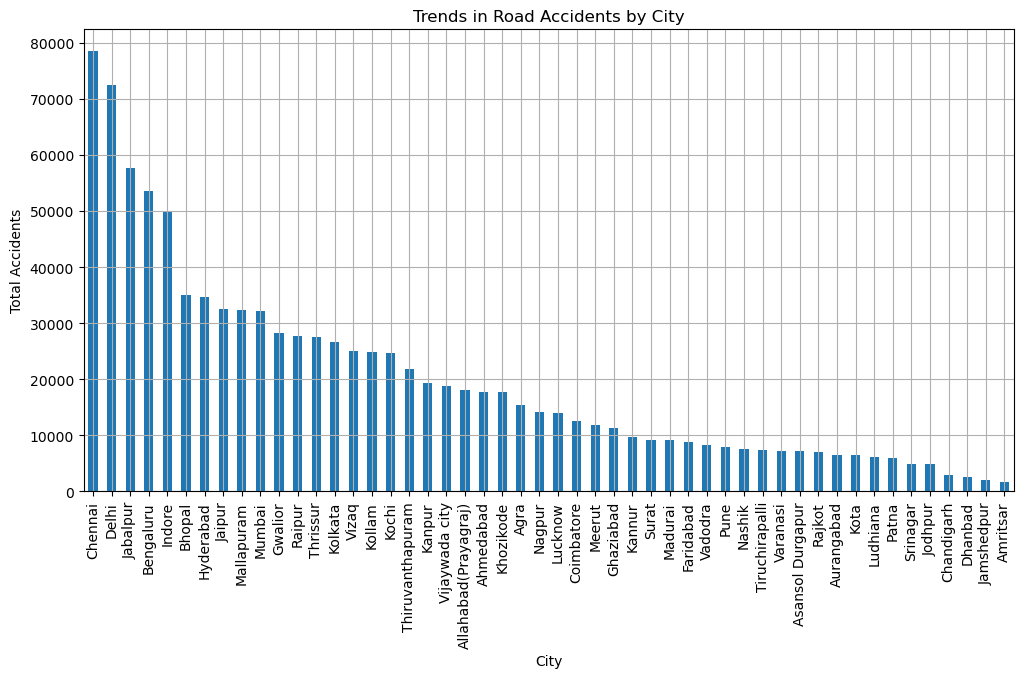

In [19]:
# Group the data by 'City' and calculate the sum of accidents
grouped_data = df.groupby('Million Plus Cities')['Count'].sum()

# Sort the grouped data by accident count in descending order
grouped_data = grouped_data.sort_values(ascending=False)

# Plot the trends
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Accidents')
plt.title('Trends in Road Accidents by City')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()